<font size="6">3. K-Means on Loan Dataset</font>

In [255]:
import matplotlib.pyplot as plt
# to change default colormap
plt.rcParams["image.cmap"] = "Set1"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [238]:
df3 = pd.read_excel('loan.xlsx')
print(df3.head())

  Sex        Age  Time_at_address Res_status  Telephone Occupation Job_status  \
0   M  50.750000            0.585      owner      given  unemploye  unemploye   
1   M  19.670000           10.000       rent  not_given   labourer  governmen   
2   F  52.830002           15.000      owner      given  creative_  private_s   
3   M  22.670000            2.540       rent  not_given  creative_  governmen   
4   M  29.250000           13.000      owner      given     driver  governmen   

   Time_employed  Time_bank Liab_ref Acc_ref  Home_Expn  Balance Decision  
0              0          0        f   given        145        0   reject  
1              0          0        t   given        140        0   reject  
2              5         14        f   given          0     2200   accept  
3              2          0        f   given          0        0   accept  
4              0          0        f   given        228        0   reject  


In [241]:
from sklearn.preprocessing import LabelEncoder
X = df3.drop('Decision', axis='columns')
y = df3['Decision']
X = pd.get_dummies(X)
print(X.head())

         Age  Time_at_address  Time_employed  Time_bank  Home_Expn  Balance  \
0  50.750000            0.585              0          0        145        0   
1  19.670000           10.000              0          0        140        0   
2  52.830002           15.000              5         14          0     2200   
3  22.670000            2.540              2          0          0        0   
4  29.250000           13.000              0          0        228        0   

   Sex_F  Sex_M  Res_status_owner  Res_status_rent  ...  Job_status_military  \
0      0      1                 1                0  ...                    0   
1      0      1                 0                1  ...                    0   
2      1      0                 1                0  ...                    0   
3      0      1                 0                1  ...                    0   
4      0      1                 1                0  ...                    0   

   Job_status_private_s  Job_status_retired 

In [265]:
# Create cluster feature
kmeans = KMeans(n_clusters=2)
y_predicted = kmeans.fit_predict(X)
print(y_predicted)
X["Cluster"] = kmeans.fit_predict(X)
print("array")
print(X["Cluster"])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
array
0      0
1      0
2      0
3      0
4      0
      ..
424    0
425    0
426    0
427    0
428    0
Name: Cluster, Length: 4

In [254]:
X["Cluster"] = X["Cluster"].astype("category")

print(X)

           Age  Time_at_address  Time_employed  Time_bank  Home_Expn  Balance  \
0    50.750000            0.585              0          0        145        0   
1    19.670000           10.000              0          0        140        0   
2    52.830002           15.000              5         14          0     2200   
3    22.670000            2.540              2          0          0        0   
4    29.250000           13.000              0          0        228        0   
..         ...              ...            ...        ...        ...      ...   
424  34.169998            2.750              2          0        232      200   
425  22.250000            1.250              3          0        280        0   
426  23.330000            1.500              1          0        422      200   
427  21.000000            4.790              2          1         80      300   
428  27.750000            1.290              0          0        140        0   

     Sex_F  Sex_M  Res_stat

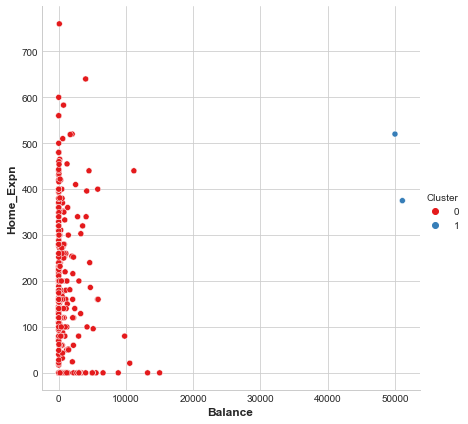

In [261]:
sns.relplot(
    x="Balance", y="Home_Expn", hue="Cluster", data=X, height=6,
);

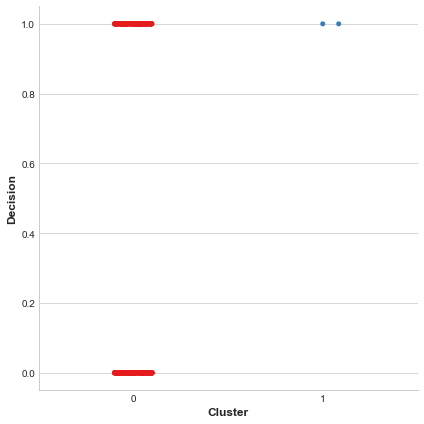

In [262]:
df3["Decision"].replace(('accept', 'reject'), (1, 0), inplace=True)
X["Decision"] = df3["Decision"]
sns.catplot(x="Cluster", y="Decision", data=X, height=6);

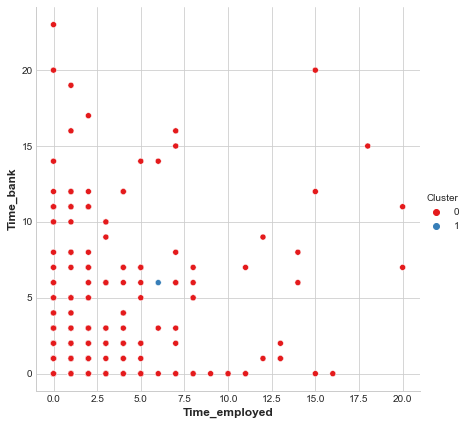

In [263]:
sns.relplot(
    x="Time_employed", y="Time_bank", hue="Cluster", data=X, height=6,
);

<font size="10">2. R to Python</font>

<font size="5">2.a K-means + Hierarchical Clustering R-Python</font>

In [221]:
#extracting data
import statsmodels.api as sm
mtcars_r = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
print (mtcars_r.head())

                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  


Text(0, 0.5, 'WCSS')

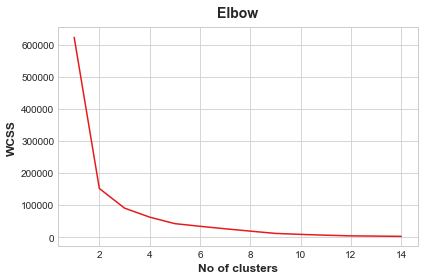

In [222]:
from sklearn.cluster import KMeans
X = mtcars_r.iloc[:,1:12]
wcss=[]
for i in range(1,15):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,15)
plt.plot(number_clusters, wcss)
plt.title('Elbow')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')

In [223]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(mtcars_r[['mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']])
print(y_predicted)

[0 0 3 2 2 0 1 0 0 0 0 2 2 2 4 4 4 3 3 3 3 2 2 1 4 3 3 3 1 0 1 0]


In [224]:
mtcars_r['cluster']=y_predicted
mtcars_r.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cluster
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,3
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,2
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


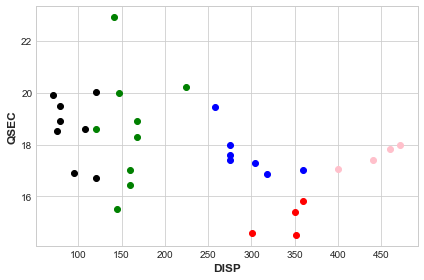

In [225]:
mtcars_r_0 = mtcars_r[mtcars_r.cluster==0]
mtcars_r_1 = mtcars_r[mtcars_r.cluster==1]
mtcars_r_2 = mtcars_r[mtcars_r.cluster==2]
mtcars_r_3 = mtcars_r[mtcars_r.cluster==3]
mtcars_r_4 = mtcars_r[mtcars_r.cluster==4]

plt.scatter(mtcars_r_0.disp, mtcars_r_0['qsec'], color='green')
plt.scatter(mtcars_r_1.disp, mtcars_r_1['qsec'], color='red')
plt.scatter(mtcars_r_2.disp, mtcars_r_2['qsec'], color='blue')
plt.scatter(mtcars_r_3.disp, mtcars_r_3['qsec'], color='black')
plt.scatter(mtcars_r_4.disp, mtcars_r_4['qsec'], color='pink')

plt.xlabel('DISP')
plt.ylabel('QSEC')
plt.legend()

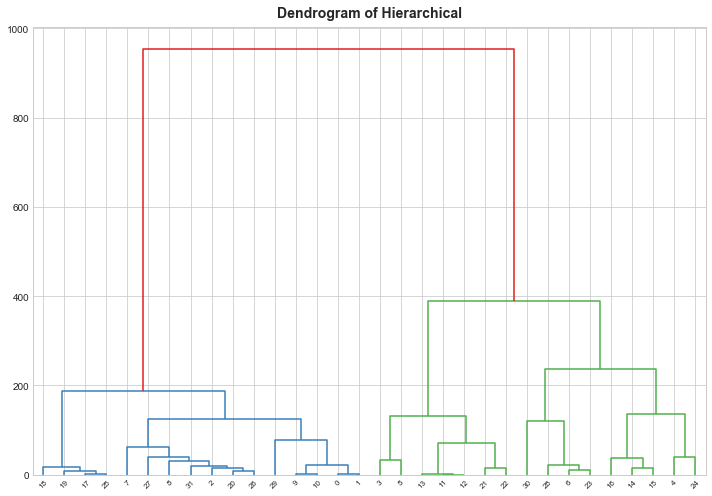

In [226]:
plt.figure(figsize=(10,7))
plt.title("Dendrogram of Hierarchical")
dend = shc.dendrogram(shc.linkage(X, method='ward', metric='euclidean'))

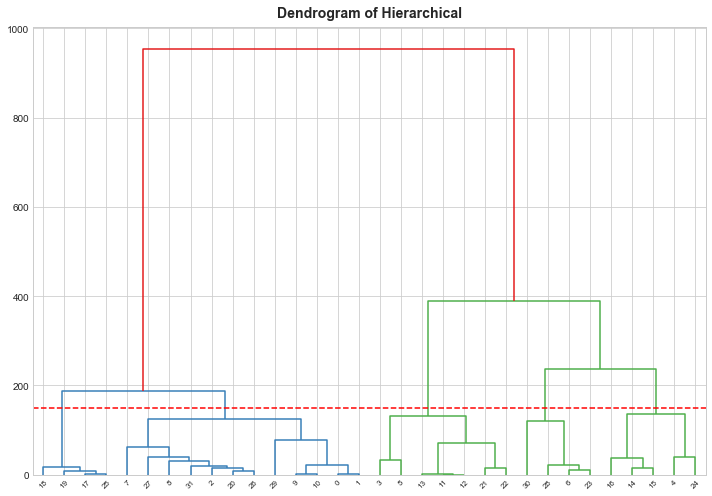

In [227]:
plt.figure(figsize=(10,7))
plt.title("Dendrogram of Hierarchical")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=150, color='r', linestyle='--')

<font size="6">2.b Circles R-Python </font>

In [230]:
#extracting data
import random

i = np.linspace(start=0, stop=360, num=5)
theta = i * np.pi // 180
r1 = 5
r2 = 10
x_1 = []
y_1 = []
x_2 = []
y_2 = []
c1 = []
c2 = [] 

for i in range(0, 360, 4):
    theta = i * np.pi / 180
    x1 = r1 * np.cos(theta)
    #print(x1)
    y1 = r1 * np.sin(theta) + random.random() * 0.2
    x2 = r2 * np.cos(theta)
    y2 = r2 * np.sin(theta) + random.random() * 0.2
    ##y2 = r2 * np.sin(theta) + np.random.normal(0, 0.2 , len(x2))  # mean sd size
    
    x_1.append(x1)
    y_1.append(y1)
    x_2.append(x2)
    y_2.append(y2)
    c1.append((x1,y1))
    c2.append((x2,y2))

#print (x_1)
#print("-----")
#print (y_1)
#print (x_2)
#print (y_2)

#data_1 = pd.DataFrame({'xv':x_1, 'yv':y_1, 'class':1})
#print(data_1)
#data_2 = pd.DataFrame({'xv':x_2, 'yv':y_2, 'class':2})
#print(data_2)
#data = pd.concat([data_1, data_2])
#print("data")
#print(data)

#alternate way
print("data c")
c = np.concatenate((c1, c2))
#print(c)
#data_df = pd.DataFrame({'xv':c1, 'yv':c2})
data_df = pd.DataFrame(c)
data_df.columns =['xv', 'yv']
print(data_df)

data c
           xv        yv
0    5.000000  0.150030
1    4.987820  0.426011
2    4.951340  0.820803
3    4.890738  1.182362
4    4.806308  1.485360
..        ...       ...
175  9.396926 -3.265888
176  9.612617 -2.614663
177  9.781476 -2.078781
178  9.902681 -1.264065
179  9.975641 -0.542823

[180 rows x 2 columns]


[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


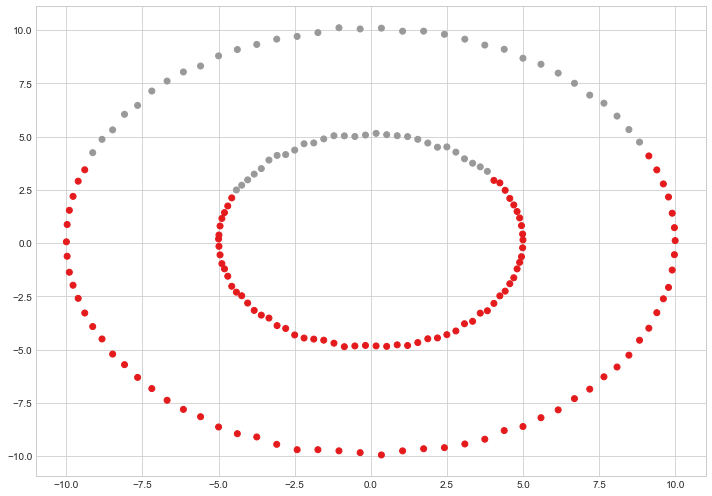

In [231]:
from sklearn.cluster import AgglomerativeClustering
# to change default colormap
plt.rcParams["image.cmap"] = "Set1"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
print(cluster.fit_predict(data_df))

plt.figure(figsize=(10,7))
plt.scatter(data_df['xv'], data_df['yv'], c = cluster.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]


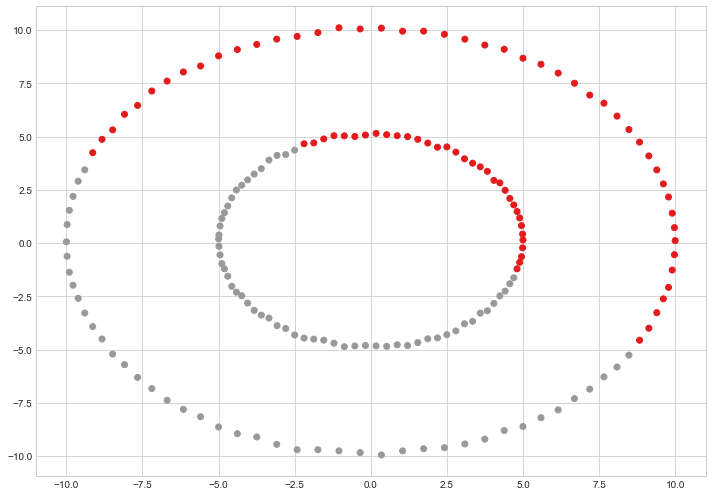

In [233]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
print(cluster.fit_predict(data_df))

plt.figure(figsize=(10,7))
plt.scatter(data_df['xv'], data_df['yv'], c=cluster.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


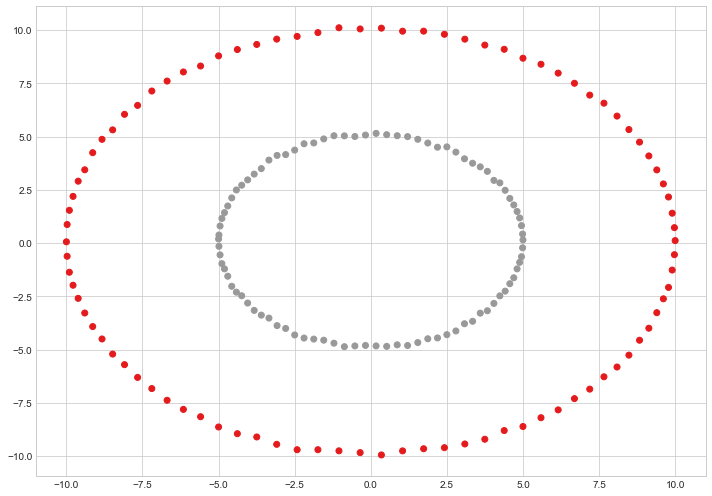

In [234]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
print(cluster.fit_predict(data_df))

plt.figure(figsize=(10,7))
plt.scatter(data_df['xv'], data_df['yv'], c = cluster.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


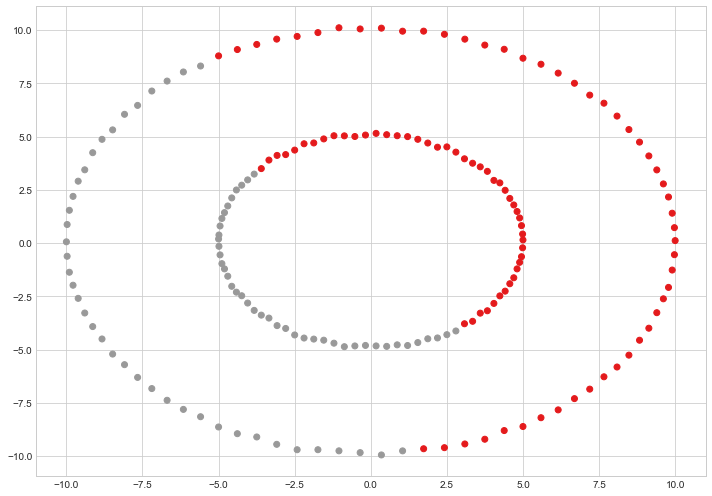

In [235]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
print(cluster.fit_predict(data_df))

plt.figure(figsize=(10,7))
plt.scatter(data_df['xv'], data_df['yv'], c = cluster.labels_)

<font size="5">2.c Play Hierarchical Clustering R-Python</font>

In [228]:
# Play Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel("play.xlsx")
print(df.head())
df = pd.get_dummies(df)
print(df)

    Outlook  Temperature  Humidity   Windy Decision
0  overcast           72        90  strong     play
1  overcast           83        78    weak     play
2  overcast           64        65  strong     play
3  overcast           81        75    weak     play
4     sunny           75        70  strong     play
    Temperature  Humidity  Outlook_overcast  Outlook_rain  Outlook_sunny  \
0            72        90                 1             0              0   
1            83        78                 1             0              0   
2            64        65                 1             0              0   
3            81        75                 1             0              0   
4            75        70                 0             0              1   
5            80        90                 0             0              1   
6            85        85                 0             0              1   
7            72        95                 0             0              1   
8   

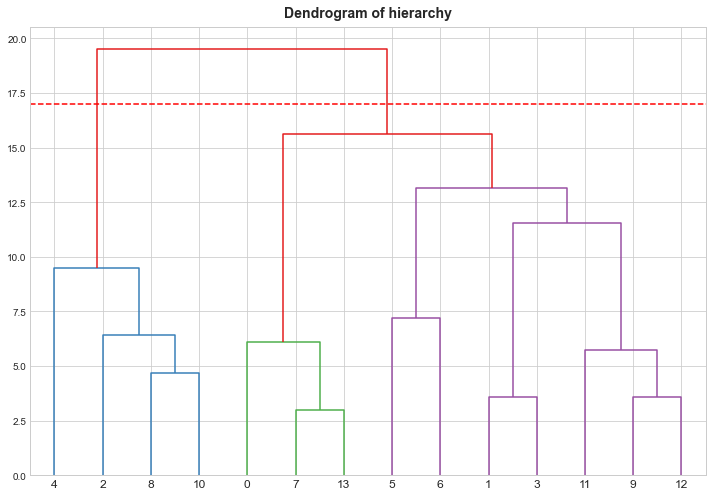

In [193]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrogram of hierarchy")
dend = shc.dendrogram(shc.linkage(df, method='average'))
plt.axhline(y=17, color='r', linestyle='--')

In [198]:
from sklearn.cluster import AgglomerativeClustering
# to change default colormap
plt.rcParams["image.cmap"] = "Set1"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster.fit_predict(df)

array([2, 0, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 2])

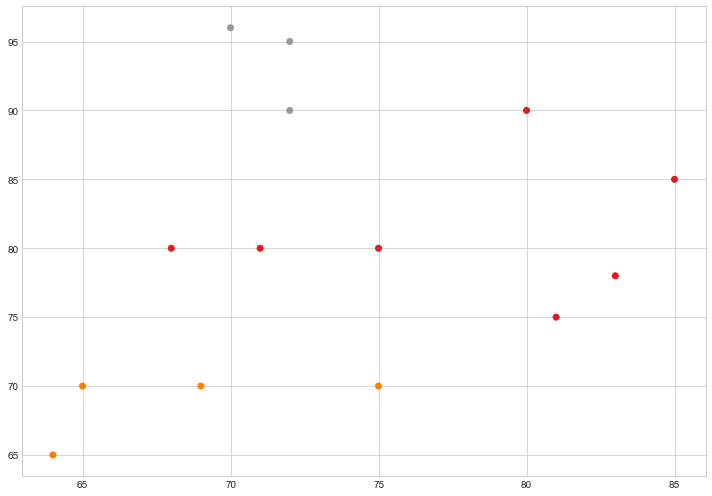

In [199]:
plt.figure(figsize=(10,7))
plt.scatter(df['Temperature'], df['Humidity'], c=cluster.labels_)

<font size="5">2.d Iris Hierarchical Clustering R-Python</font>

In [236]:
#extracting iris data
import statsmodels.api as sm
iris = sm.datasets.get_rdataset("iris", "datasets", cache=True).data
print (iris.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [209]:
iris = pd.get_dummies(iris)
print(iris.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species_setosa  \
0           5.1          3.5           1.4          0.2               1   
1           4.9          3.0           1.4          0.2               1   
2           4.7          3.2           1.3          0.2               1   
3           4.6          3.1           1.5          0.2               1   
4           5.0          3.6           1.4          0.2               1   

   Species_versicolor  Species_virginica  
0                   0                  0  
1                   0                  0  
2                   0                  0  
3                   0                  0  
4                   0                  0  


In [210]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster.fit_predict(iris)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [211]:
iris['cluster'] = cluster.fit_predict(iris)
print(iris.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species_setosa  \
0           5.1          3.5           1.4          0.2               1   
1           4.9          3.0           1.4          0.2               1   
2           4.7          3.2           1.3          0.2               1   
3           4.6          3.1           1.5          0.2               1   
4           5.0          3.6           1.4          0.2               1   

   Species_versicolor  Species_virginica  cluster  
0                   0                  0        1  
1                   0                  0        1  
2                   0                  0        1  
3                   0                  0        1  
4                   0                  0        1  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


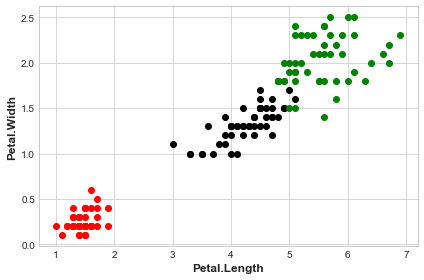

In [212]:
iris_0 = iris[iris.cluster==0]
iris_1 = iris[iris.cluster==1]
iris_2 = iris[iris.cluster==2]

plt.scatter(iris_0['Petal.Length'], iris_0['Petal.Width'], color='black')
plt.scatter(iris_1['Petal.Length'], iris_1['Petal.Width'], color='red')
plt.scatter(iris_2['Petal.Length'], iris_2['Petal.Width'], color='green')

plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()